# Adjusting the axes of the individual plots within animations with callbacks

This tutorial is an example of how to change axis and figures with animated figures in PHOEBE, using the `animate_callback` option.

Contributed by: [Soetkin](https://github.com/soetkin)

In [1]:
import phoebe
import matplotlib.pyplot as plt
# %matplotlib notebook
from IPython.display import Image, display
import numpy as np

In [2]:
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import mark_inset,inset_axes

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### Adjusting axis
Here we define a function that will change the axis of our animation:
1. Remove axis from the top frame
2. set axis of a subplot of the LC curve

In [4]:
def edit_axes(mplfig):
    # Remove axis
    mplfig.axes[0].set_axis_off()
    mplfig.axes[0].set_xlim([-5,5])
    mplfig.axes[0].set_title('Star-planet system with spot')

    # adjust scale and position of zoom-in of eclipse
    mplfig.axes[2].set_position([0.68, 0.15, 0.2, 0.2])
    mplfig.axes[2].set_ylabel('')
    mplfig.axes[2].set_xlabel('')
    ymin, ymax =  mplfig.axes[1].get_ylim()
    mplfig.axes[2].set_xlim([-0.15, 0.15])
    mplfig.axes[2].set_ylim([ymin, 0.98])
    mplfig.axes[2].set_xticks([-0.1, -0.05, 0, 0.05, 0.1])
    mplfig.axes[2].set_yticks([0.96, 0.965, 0.97])
    mplfig.axes[2].set_xticklabels(["", "", "", "", ""])
    mplfig.axes[2].set_yticklabels(["", "", ""])
    mplfig.axes[2].tick_params(axis='both', which='both', direction='in')
    mark_inset(mplfig.axes[1], mplfig.axes[2], loc1 = 2, loc2 = 4)
    return mplfig

## Creating the binary

#### Setting up the star-planet system

Change the len_time if you want less computing time

In [5]:
b = phoebe.default_binary()

In [6]:
# Choose period, eccentricity, length of the time points, mass ratio and argument of periastron
P = 2
len_time = 100
ecc = 0.
q = 0.001
per0 = 0
mass1 = 1.
requiv1 = 1
requiv2 = 0.1
teff1 = 6000
teff2 = 400
times_input = phoebe.linspace(-P/2, P/2, len_time)

In [7]:
b.set_value('period@orbit', value=P)
b.set_value('ecc@orbit', value=ecc)
b.set_value('q@component', value=q)
b.set_value('per0@orbit', value=per0)

In [8]:
try:
    b.flip_constraint('mass@primary', solve_for='sma')
except:
    pass
b.set_value('mass@primary@component', value=mass1)

In [9]:
b.set_value('requiv@primary@component', value=requiv1)
b.set_value('requiv@secondary@component', value=requiv2)

b.set_value('teff@primary@component', value=teff1)
b.set_value('teff@secondary@component', value=teff2)

#### Creating datasets

In [10]:
b.add_dataset('lc', compute_times=times_input, dataset='lc01', overwrite=True)
b.add_dataset('mesh', compute_times=times_input, dataset='mesh01', overwrite=True)

<ParameterSet: 85 parameters | contexts: dataset, constraint, compute, figure>

In [11]:
b.set_value('columns', value=['teffs'])

#### Adding the spot

In [12]:
b.add_feature('spot', component='primary', feature='spot01', overwrite=True)
b.set_value(qualifier='relteff', feature='spot01', value=0.9)
b.set_value(qualifier='radius', feature='spot01', value=15)  #degree
b.set_value(qualifier='colat', feature='spot01', value=90)   #degree
b.set_value(qualifier='long', feature='spot01', value=0)    #degree
b.set_value(qualifier='syncpar', component='primary', value=1.)

In [13]:
b.set_value(qualifier='atm', component='secondary', value='blackbody')
b.set_value(qualifier='ld_mode', component='secondary', value='manual')
b.set_value(qualifier='ld_mode_bol', component='secondary', value='manual')

In [14]:
# Let's make the spot look smooth!
b.set_value('ntriangles@primary', value=5000)

In [15]:
b.run_compute()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 45.74it/s]


<ParameterSet: 1005 parameters | kinds: mesh, lc>

Let's see what the spot looks like

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


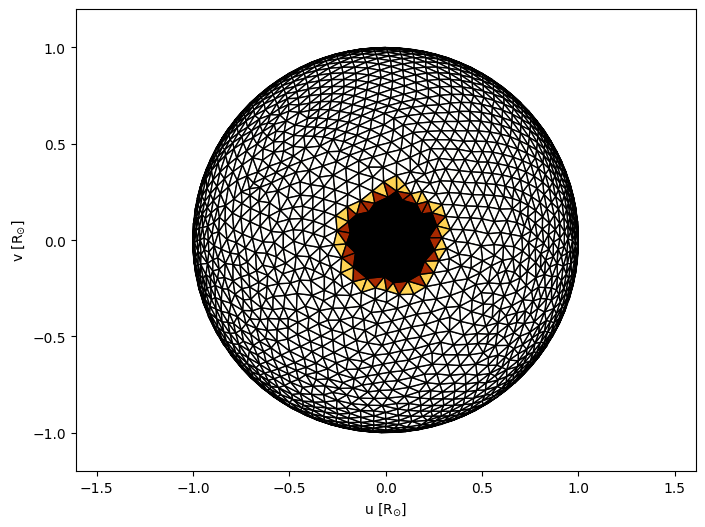

In [16]:
afig, mplfig = b.filter(component='primary', time=times_input[int(len_time/2)]).plot(fc='teffs', show=True)

MovieWriter ffmpeg unavailable; using Pillow instead.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


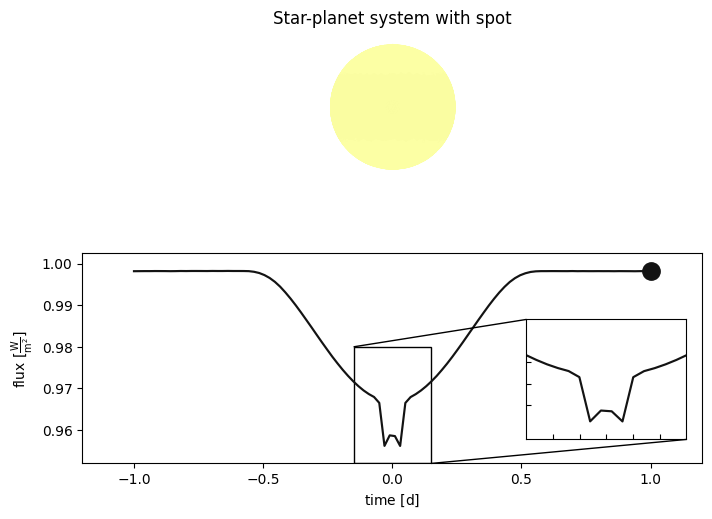

In [17]:
afig, mplfig = b.plot(dataset=['mesh01'],
                      fc={'primary@mesh01': 'teffs'}, fcmap={'primary@model@mesh01': 'inferno'}, ec={'primary@mesh01': 'face'},
                      axpos=211)
# We only assigned the colormap to the primary
b['lc01'].plot(size=0.01, 
               axpos=212)
# Below is to create a zoom-in plot of the LC at the eclipse
b['lc01'].plot(size=0.01, 
               axpos=(4,4,16))
fig = plt.figure()
afig, mplanim = b.savefig('spot_aligned.gif', fig=fig, draw_sidebars=False, 
                          animate_callback=edit_axes, animate=True)

![animation](spot_aligned.gif)